# UPI Growth Analysis in India
## Level 1 – Data Science Foundation Project

**Objective:**  
To analyze the growth trends of UPI transactions in India using exploratory data analysis and basic statistical techniques.

**Tools:** Python, Pandas, Matplotlib  
**Platform:** Jupyter Notebook (Anaconda)


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [5]:
# Load the Excel dataset
df = pd.read_excel("upianalysis.xlsx")

# View first few rows
df.head()


,Month,No. of Banks live on UPI,Volume (In Mn.),Value (In Cr.)
0,November-2025,684,"20,466.98","26,31,632.63"
1,October-2025,683,"20,700.92","27,27,790.68"
2,September-2025,686,"19,633.43","24,89,736.54"
3,August-2025,688,"20,008.31","24,85,472.91"
4,July-2025,684,"19,467.95","25,08,498.09"


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Month                     8 non-null      object
 1   No. of Banks live on UPI  8 non-null      int64 
 2   Volume (In Mn.)           8 non-null      object
 3   Value (In Cr.)            8 non-null      object
dtypes: int64(1), object(3)
memory usage: 388.0+ bytes


In [9]:
df.columns

Index(['Month', 'No. of Banks live on UPI', 'Volume (In Mn.)',
       'Value (In Cr.)'],
      dtype='object')

In [11]:
df.describe()

,No. of Banks live on UPI
count,8.000000
mean,680.125000
std,7.160158
min,668.000000
25%,674.500000
50%,683.500000
75%,684.500000
max,688.000000


In [13]:
df_clean = df.copy()


In [15]:
df_clean.columns


Index(['Month', 'No. of Banks live on UPI', 'Volume (In Mn.)',
       'Value (In Cr.)'],
      dtype='object')

In [17]:
df_clean = df_clean.rename(columns={
    'Month': 'month',
    'No. of Banks live on UPI': 'banks_live',
    'Volume (In Mn.)': 'transaction_volume_mn',
    'Value (In Cr.)': 'transaction_value_cr'
})


In [19]:
df_clean.columns


Index(['month', 'banks_live', 'transaction_volume_mn', 'transaction_value_cr'], dtype='object')

In [21]:
df_clean['month'] = pd.to_datetime(df_clean['month'])


/var/folders/kx/kjk4vhmj427gpn9_09f49st00000gn/T/ipykernel_10495/1896635331.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_clean['month'] = pd.to_datetime(df_clean['month'])


In [23]:
df_clean.dtypes


month                    datetime64[ns]
banks_live                        int64
transaction_volume_mn            object
transaction_value_cr             object
dtype: object

In [25]:
df_clean['transaction_volume_mn'].head()


0    20,466.98
1    20,700.92
2    19,633.43
3    20,008.31
4    19,467.95
Name: transaction_volume_mn, dtype: object

In [27]:
df_clean['transaction_volume_mn'] = (
    df_clean['transaction_volume_mn']
    .astype(str)
    .str.replace(r'[^0-9.]', '', regex=True)
)

df_clean['transaction_value_cr'] = (
    df_clean['transaction_value_cr']
    .astype(str)
    .str.replace(r'[^0-9.]', '', regex=True)
)


In [29]:
df_clean['transaction_volume_mn'] = pd.to_numeric(df_clean['transaction_volume_mn'])
df_clean['transaction_value_cr'] = pd.to_numeric(df_clean['transaction_value_cr'])


In [31]:
df_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   month                  8 non-null      datetime64[ns]
 1   banks_live             8 non-null      int64         
 2   transaction_volume_mn  8 non-null      float64       
 3   transaction_value_cr   8 non-null      float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 388.0 bytes


In [33]:
df_clean = df_clean.sort_values('month').reset_index(drop=True)


In [35]:
plt.style.use('seaborn-v0_8')


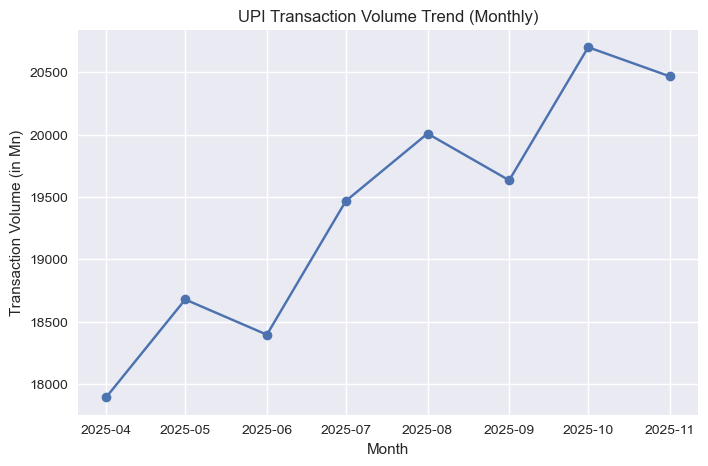

In [37]:
plt.figure(figsize=(8,5))
plt.plot(df_clean['month'], df_clean['transaction_volume_mn'], marker='o')
plt.title('UPI Transaction Volume Trend (Monthly)')
plt.xlabel('Month')
plt.ylabel('Transaction Volume (in Mn)')
plt.grid(True)
plt.show()


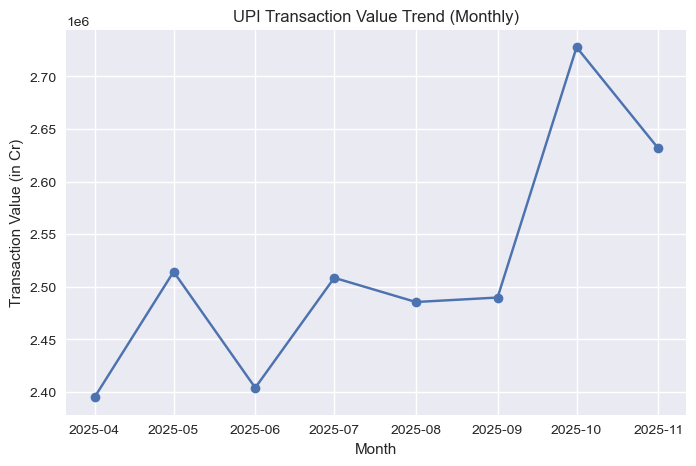

In [39]:
plt.figure(figsize=(8,5))
plt.plot(df_clean['month'], df_clean['transaction_value_cr'], marker='o')
plt.title('UPI Transaction Value Trend (Monthly)')
plt.xlabel('Month')
plt.ylabel('Transaction Value (in Cr)')
plt.grid(True)
plt.show()


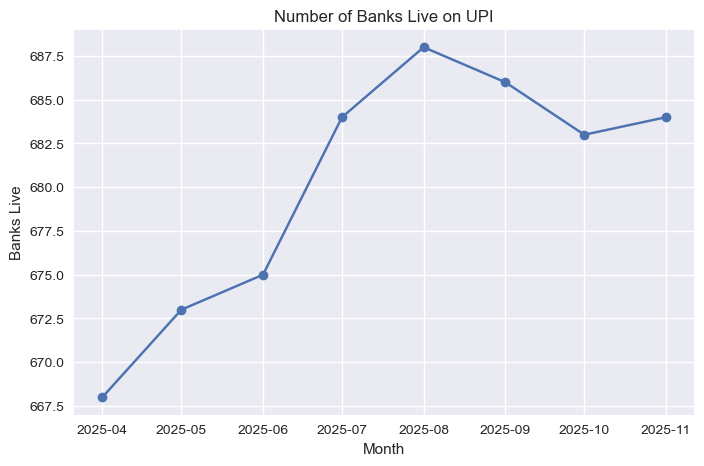

In [41]:
plt.figure(figsize=(8,5))
plt.plot(df_clean['month'], df_clean['banks_live'], marker='o')
plt.title('Number of Banks Live on UPI')
plt.xlabel('Month')
plt.ylabel('Banks Live')
plt.grid(True)
plt.show()


### Exploratory Data Analysis (EDA) – Key Observations

- UPI transaction volume shows a consistent upward trend across the observed months.
- Transaction value also increases over time, indicating growing monetary usage of UPI.
- The number of banks live on UPI grows gradually, reflecting steady expansion of the UPI ecosystem.
- Minor fluctuations are observed, which are expected in real-world financial data.


In [43]:
df_clean = df_clean.sort_values('month').reset_index(drop=True)


In [45]:
df_clean['volume_mom_growth_pct'] = (
    df_clean['transaction_volume_mn'].pct_change() * 100
)

df_clean[['month', 'transaction_volume_mn', 'volume_mom_growth_pct']]


,month,transaction_volume_mn,volume_mom_growth_pct
0,2025-04-01,17893.42,NaN
1,2025-05-01,18677.46,4.381722
2,2025-06-01,18395.01,-1.512251
3,2025-07-01,19467.95,5.832777
4,2025-08-01,20008.31,2.775639
5,2025-09-01,19633.43,-1.873622
6,2025-10-01,20700.92,5.437104
7,2025-11-01,20466.98,-1.130095


In [47]:
df_clean['value_mom_growth_pct'] = (
    df_clean['transaction_value_cr'].pct_change() * 100
)

df_clean[['month', 'transaction_value_cr', 'value_mom_growth_pct']]


,month,transaction_value_cr,value_mom_growth_pct
0,2025-04-01,2394925.87,NaN
1,2025-05-01,2514297.01,4.984335
2,2025-06-01,2403930.69,-4.389550
3,2025-07-01,2508498.09,4.349851
4,2025-08-01,2485472.91,-0.917887
5,2025-09-01,2489736.54,0.171542
6,2025-10-01,2727790.68,9.561419
7,2025-11-01,2631632.63,-3.525126


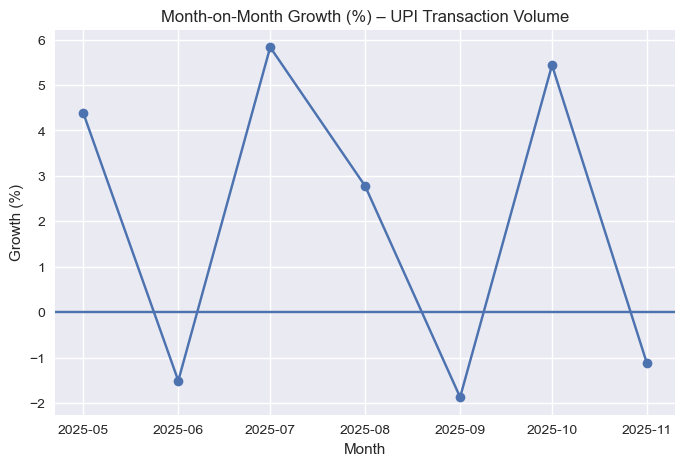

In [49]:
plt.figure(figsize=(8,5))
plt.plot(df_clean['month'], df_clean['volume_mom_growth_pct'], marker='o')
plt.axhline(0)
plt.title('Month-on-Month Growth (%) – UPI Transaction Volume')
plt.xlabel('Month')
plt.ylabel('Growth (%)')
plt.grid(True)
plt.show()


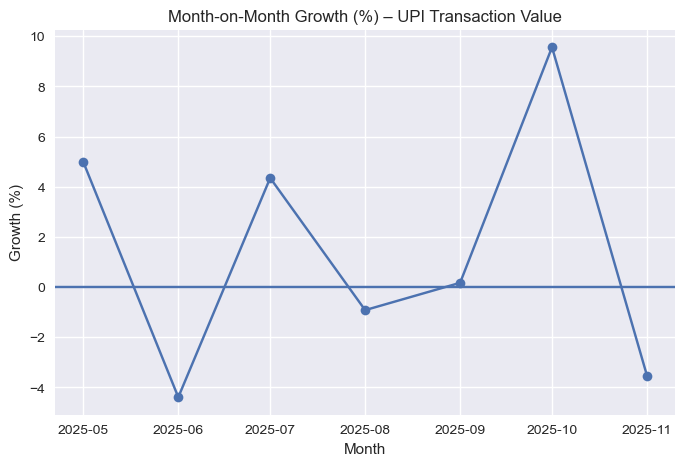

In [51]:
plt.figure(figsize=(8,5))
plt.plot(df_clean['month'], df_clean['value_mom_growth_pct'], marker='o')
plt.axhline(0)
plt.title('Month-on-Month Growth (%) – UPI Transaction Value')
plt.xlabel('Month')
plt.ylabel('Growth (%)')
plt.grid(True)
plt.show()


### Growth Analysis – Month-on-Month Insights

- UPI transaction volume shows positive month-on-month growth in most periods, indicating continued adoption.
- Growth rates fluctuate rather than remaining constant, reflecting real-world usage dynamics.
- Transaction value growth exhibits higher variability compared to volume, suggesting changes in average transaction size.
- Occasional slowdowns do not indicate decline, but normal stabilization effects in a maturing digital payment system.


In [53]:
df_clean[['month',
          'transaction_volume_mn',
          'transaction_value_cr',
          'banks_live',
          'volume_mom_growth_pct',
          'value_mom_growth_pct']]


,month,transaction_volume_mn,transaction_value_cr,banks_live,volume_mom_growth_pct,value_mom_growth_pct
0,2025-04-01,17893.42,2394925.87,668,NaN,NaN
1,2025-05-01,18677.46,2514297.01,673,4.381722,4.984335
2,2025-06-01,18395.01,2403930.69,675,-1.512251,-4.389550
3,2025-07-01,19467.95,2508498.09,684,5.832777,4.349851
4,2025-08-01,20008.31,2485472.91,688,2.775639,-0.917887
5,2025-09-01,19633.43,2489736.54,686,-1.873622,0.171542
6,2025-10-01,20700.92,2727790.68,683,5.437104,9.561419
7,2025-11-01,20466.98,2631632.63,684,-1.130095,-3.525126


## Final Insights

- UPI transaction volume demonstrates a sustained upward trend, indicating increasing user adoption over time.
- Transaction value growth broadly follows volume growth but shows higher variability, suggesting changes in average transaction sizes.
- The number of banks live on UPI increases gradually, reflecting steady ecosystem expansion rather than sudden onboarding.
- Month-on-month growth rates fluctuate, which is typical for real-world financial systems and does not indicate instability.
- Overall, the data suggests that UPI has moved from rapid adoption toward a phase of consolidation and maturity.


## Strategic Implications

- Continued growth in transaction volume indicates strong consumer reliance on UPI for everyday payments.
- Variability in transaction value growth suggests opportunities for banks and fintech firms to focus on higher-value use cases.
- Gradual growth in participating banks reflects ecosystem stability and widespread institutional adoption.
- Policymakers and payment infrastructure providers should focus on scalability, security, and reliability as UPI matures.


## Limitations

- The analysis is based on a limited monthly dataset and does not cover long-term seasonal effects.
- User-level or regional transaction data was not available.
- External factors such as policy changes or economic events were not explicitly modeled.


## Future Scope

- Extend analysis using multi-year UPI data to capture long-term trends.
- Apply forecasting techniques to model future transaction growth.
- Segment transaction data by region or use-case if granular data becomes available.
- Integrate machine learning models for predictive and behavioral analysis.


## Conclusion

This project applied data science techniques to analyze the growth of UPI transactions in India. Through data cleaning, exploratory analysis, and growth metrics, the study highlights sustained adoption, ecosystem maturity, and strategic implications for the digital payments landscape. The analysis demonstrates how structured data science methods can be used to derive meaningful insights from real-world financial data.
